### t2.micro, AWS Marketplace -> Anaconda with Python 3

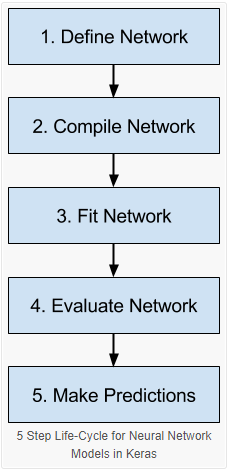

In [1]:
from IPython.display import Image
Image('Keras_Lifecycle.png')

Deep learning neural networks are very easy to create and evaluate in Python with Keras, but you must follow a strict model life-cycle.

https://machinelearningmastery.com/5-step-life-cycle-neural-network-models-keras/

### Step 1. Define Network

Neural networks are defined in Keras as a sequence of layers. The container for these layers is the Sequential class.

The first step is to create an instance of the Sequential class. Then you can create your layers and add them in the order that they should be connected.

The first layer in the network must define the number of inputs to expect. The way that this is specified can differ depending on the network type, but for a Multilayer Perceptron model this is specified by the input_dim attribute.

Think of a Sequential model as a pipeline with your raw data fed in at the bottom and predictions that come out at the top.

This is a helpful conception in Keras as concerns that were traditionally associated with a layer can also be split out and added as separate layers, clearly showing their role in the transform of data from input to prediction.

For example, activation functions that transform a summed signal from each neuron in a layer can be extracted and added to the Sequential as a layer-like object called Activation.

The choice of activation function is most important for the output layer as it will define the format that predictions will take.

Below are some common predictive modeling problem types and the structure and standard activation function that you can use in the output layer:

- <b>Regression:</b> Linear activation function or ‘linear’ and the number of neurons matching the number of outputs.
- <b>Binary Classification (2 class):</b> Logistic activation function or ‘sigmoid’ and one neuron the output layer.
- <b>Multiclass Classification (>2 class):</b> Softmax activation function or ‘softmax’ and one output neuron per class value, assuming a one-hot encoded output pattern.

### Step 2. Compile Network

Compilation is an efficiency step. It transforms the simple sequence of layers that we defined into a highly efficient series of matrix transforms in a format intended to be executed on your GPU or CPU, depending upon how Keras is configured.

Compilation is always required after defining a model. This includes both before training it using an optimization scheme as well as loading a set of pre-trained weights from a save file. The reason is that the compilation step prepares an efficient representation of the network that is also required to make predictions on your hardware.

Compilation requires a number of parameters to be defined that are tailored to training your network. Specifically, the optimization algorithm to use to train the network and the loss function used to evaluate the network that is minimized by the optimization algorithm.

The type of predictive modeling problem imposes constraints on the type of loss function that can be used.

For example, below are some standard loss functions for different predictive model types:

- <b>Regression:</b> Mean Squared Error or ‘mse‘.
- <b>Binary Classification (2 class):</b> Logarithmic Loss, also called cross entropy or ‘binary_crossentropy‘.
- <b>Multiclass Classification (>2 class):</b> Multiclass Logarithmic Loss or ‘categorical_crossentropy‘.

The most commonly used optimization algorithms because of their generally better performance are:

- <b>Stochastic Gradient Descent</b> or ‘sgd‘ that requires the tuning of a learning rate and momentum.
- <b>ADAM</b> or ‘adam‘ that requires the tuning of learning rate.
- <b>RMSprop</b> or ‘rmsprop‘ that requires the tuning of learning rate.

Finally, you can also specify metrics to collect while fitting your model in addition to the loss function. Generally, the most useful additional metric to collect is accuracy for classification problems. The metrics to collect are specified by name in an array.


### Step 3. Fit Network

Once the network is compiled, it can be fit, which means adapt the weights on a training dataset.

Fitting the network requires the training data to be specified, both a matrix of input patterns X and an array of matching output patterns y.

The network is trained using the backpropagation algorithm and optimized according to the optimization algorithm and loss function specified when compiling the model.

The backpropagation algorithm requires that the network be trained for a specified number of epochs or exposures to the training dataset.

Each epoch can be partitioned into groups of input-output pattern pairs called batches. This defines the number of patterns that the network is exposed to before the weights are updated within an epoch. It is also an efficiency optimization, ensuring that not too many input patterns are loaded into memory at a time.

Once fit, a history object is returned that provides a summary of the performance of the model during training. This includes both the loss and any additional metrics specified when compiling the model, recorded each epoch.

### Step 4. Evaluate Network

Once the network is trained, it can be evaluated.

The network can be evaluated on the training data, but this will not provide a useful indication of the performance of the network as a predictive model, as it has seen all of this data before.

We can evaluate the performance of the network on a separate dataset unseen during testing. This will provide an estimate of the performance of the network at making predictions for unseen data in the future.

The model evaluates the loss across all of the test patterns, as well as any other metrics specified when the model was compiled, like classification accuracy. A list of evaluation metrics is returned.

### Step 5. Make Predictions

Finally, once we are satisfied with the performance of our fit model, we can use it to make predictions on new data.

This is as easy as calling the predict() function on the model with an array of new input patterns.

The predictions will be returned in the format provided by the output layer of the network.

In the case of a regression problem, these predictions may be in the format of the problem directly, provided by a linear activation function.

For a binary classification problem, the predictions may be an array of probabilities for the first class that can be converted to a 1 or 0 by rounding.

For a multiclass classification problem, the results may be in the form of an array of probabilities (assuming a one hot encoded output variable) that may need to be converted to a single class output prediction using the numpy.argmax function.

### Example

This example will use the Pima Indians onset of diabetes binary classification problem.

The problem has 8 input variables and a single output class variable with the integer values 0 and 1.

We will construct a Multilayer Perceptron neural network with a 8 inputs in the visible layer, 12 neurons in the hidden layer with a rectifier activation function and 1 neuron in the output layer with a sigmoid activation function.

We will train the network for 10 epochs with a batch size of 10, optimized using the ADAM optimization algorithm and the logarithmic loss function.

Once fit, we will evaluate the model on the training data and then make standalone predictions for the training data. This is for brevity, normally we would evaluate the model on a separate test dataset and make predictions for new data.

In [3]:
# Multilayer Perceptron Neural Network in Keras
import numpy
from keras.layers import Dense
from keras.models import Sequential

# load and prepare dataset
dataset = numpy.loadtxt('pima-indians-diabetes.csv', delimiter = ',')
X       = dataset[:,0:8]
Y       = dataset[:,8  ]

# 1. define network
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'   ))
model.add(Dense( 1,                activation = 'sigmoid'))

# 2. compile network
model.compile(
              loss      = 'binary_crossentropy',
              optimizer = 'adam',
              metrics   = ['accuracy']
             )

# 3. fit network
history = model.fit(
                    X,
                    Y,
                    epochs     = 10,
                    batch_size = 10
                   )

# 4. evaluate network
loss, accuracy = model.evaluate(X, Y)

print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

# 5. make predictions
probabilities = model.predict(X)
predictions   = [float(numpy.round(x)) for x in probabilities]
accuracy      = numpy.mean(predictions == Y)

print("Prediction Accuracy: %.2f%%" % (accuracy*100))

Epoch 1/10
768/768 [==============================] - 1s 817us/step - loss: 7.7159 - acc: 0.4206
Epoch 2/10
768/768 [==============================] - 0s 109us/step - loss: 3.5337 - acc: 0.5768
Epoch 3/10
768/768 [==============================] - 0s 110us/step - loss: 3.1425 - acc: 0.6315
Epoch 4/10
768/768 [==============================] - 0s 108us/step - loss: 3.0824 - acc: 0.6302
Epoch 5/10
768/768 [==============================] - 0s 108us/step - loss: 2.9864 - acc: 0.6237
Epoch 6/10
768/768 [==============================] - 0s 109us/step - loss: 2.5698 - acc: 0.6185
Epoch 7/10
768/768 [==============================] - 0s 108us/step - loss: 1.6456 - acc: 0.6003
Epoch 8/10
768/768 [==============================] - 0s 107us/step - loss: 1.1416 - acc: 0.6328
Epoch 9/10
768/768 [==============================] - 0s 108us/step - loss: 1.0338 - acc: 0.6471
Epoch 10/10
768/768 [==============================] - 0s 124us/step

Loss: 0.95, Accuracy: 67.32%
Prediction Accuracy: 67.32%
